# BACK TESTING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
export_path = 'io/output/exports/'
predictions_path = export_path + 'predictions/'
gcn_list = ['A3TGCN2', 'DCRNN', 'TGCN', 'TGCN2', 'GConvGRU', 'GConvLSTM', 'GCLSTM']
gcn = gcn_list[3] #TGCN2

In [3]:
pivot_true = pd.read_csv(predictions_path+gcn+'_predictions.csv',index_col=0)
pivot_pred = pd.read_csv(predictions_path+gcn+'_ground_truth.csv',index_col=0)

[('buy', -306.00012), ('buy', -308.76108), ('buy', -308.43332), ('buy', -304.8993), ('buy', -303.00513), ('buy', -303.75082), ('buy', -305.71188), ('buy', -308.88382), ('buy', -308.35056), ('buy', -305.87534), ('buy', -304.52216), ('buy', -305.20282), ('buy', -306.41693), ('buy', -308.93002), ('buy', -308.47833), ('buy', -306.60764), ('buy', -304.80066), ('buy', -305.24304), ('buy', -306.78925), ('buy', -309.06586), ('buy', -308.62286), ('buy', -307.50806), ('buy', -306.19473), ('buy', -306.52188), ('buy', -308.17474), ('buy', -310.48132), ('buy', -309.51257), ('buy', -307.45828), ('buy', -305.72504), ('buy', -305.80206), ('buy', -307.09424), ('buy', -308.55667), ('buy', -308.66373), ('buy', -307.24628), ('buy', -306.04965), ('buy', -305.7414), ('buy', -306.39697), ('buy', -307.39783), ('buy', -307.67664), ('buy', -306.23785), ('buy', -304.80298), ('buy', -304.12473), ('buy', -305.501), ('buy', -307.0528), ('buy', -307.363), ('buy', -306.87482), ('buy', -305.9969), ('buy', -304.99173),

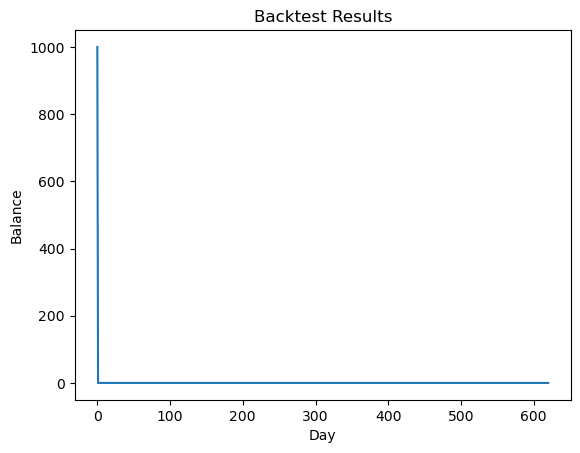

Profit: $-1000.00
Return rate: -100.00%
Win rate: 0.00%


In [4]:
# Define trading strategy
def trading_strategy(predicted_close, current_close):
    if predicted_close > current_close + (current_close * 0.2):
        return 'buy'
    elif predicted_close < current_close + (current_close * 0.2):
        return 'sell'
    else:
        return 'hold'

# Initialize variables
balance = 1000.0
shares = 0.0
trades = []
results = []

# Loop through each day in the data
for i in range(len(pivot_true)-1):
    # Get current close price
    current_close = pivot_true['DASH'][i]
    
    # Use neural network to predict next close price
    predicted_close = pivot_pred['DASH'][i]
    
    # Determine trading action based on strategy
    action = trading_strategy(predicted_close, current_close)
    
    # Execute trade
    if action == 'buy':
        shares = balance / current_close
        balance = 0.0
        trades.append(('buy', current_close))
    elif action == 'sell':
        balance = shares * current_close
        shares = 0.0
        trades.append(('sell', current_close))
    else:
        trades.append(('hold', current_close))
    
    # Record results
    results.append(balance + shares * current_close)

print(trades)
# Calculate performance metrics
profit = results[-1] - results[0]
return_rate = profit / results[0] * 100.0
win_rate = sum([1 for t in trades if t[0] == 'buy' and t[1] < t[1:][0]]) / len([t for t in trades if t[0] == 'buy']) * 100.0

# Plot results
plt.plot(results)
plt.xlabel('Day')
plt.ylabel('Balance')
plt.title('Backtest Results')
plt.show()

print('Profit: ${:.2f}'.format(profit))
print('Return rate: {:.2f}%'.format(return_rate))
print('Win rate: {:.2f}%'.format(win_rate))

